0
Nodi: 10000, Collegamenti: 50056, Mixing parameter: 0.1, number of groups: 100


Computing: 100%|███████████████████████████████████████████████████████████████████████| 20/20 [00:40<00:00,  2.02s/it]


Average time for flpa: 0.2865 seconds +- 0.0148.
Average time for asyn. lpa: 0.8416 seconds +- 0.1602.
Average time for syn. lpa: 0.8879 seconds +- 0.0267.
1
Nodi: 10000, Collegamenti: 50126, Mixing parameter: 0.2, number of groups: 100


Computing: 100%|███████████████████████████████████████████████████████████████████████| 20/20 [00:50<00:00,  2.54s/it]


Average time for flpa: 0.3417 seconds +- 0.0141.
Average time for asyn. lpa: 1.001 seconds +- 0.1432.
Average time for syn. lpa: 1.1983 seconds +- 0.0469.
2
Nodi: 10000, Collegamenti: 49980, Mixing parameter: 0.3, number of groups: 100


Computing: 100%|███████████████████████████████████████████████████████████████████████| 20/20 [01:01<00:00,  3.07s/it]


Average time for flpa: 0.4281 seconds +- 0.0214.
Average time for asyn. lpa: 1.1245 seconds +- 0.0919.
Average time for syn. lpa: 1.5199 seconds +- 0.0452.
3
Nodi: 10000, Collegamenti: 49847, Mixing parameter: 0.4, number of groups: 100


Computing: 100%|███████████████████████████████████████████████████████████████████████| 20/20 [01:11<00:00,  3.57s/it]


Average time for flpa: 0.5464 seconds +- 0.0181.
Average time for asyn. lpa: 1.939 seconds +- 0.3658.
Average time for syn. lpa: 1.08 seconds +- 0.0341.
4
Nodi: 10000, Collegamenti: 50216, Mixing parameter: 0.5, number of groups: 100


Computing: 100%|███████████████████████████████████████████████████████████████████████| 20/20 [01:23<00:00,  4.16s/it]


Average time for flpa: 0.8523 seconds +- 0.0324.
Average time for asyn. lpa: 2.3367 seconds +- 0.3482.
Average time for syn. lpa: 0.9716 seconds +- 0.0361.
5
Nodi: 10000, Collegamenti: 49708, Mixing parameter: 0.6, number of groups: 100


Computing: 100%|███████████████████████████████████████████████████████████████████████| 20/20 [00:50<00:00,  2.54s/it]


Average time for flpa: 1.0628 seconds +- 0.1216.
Average time for asyn. lpa: 0.7399 seconds +- 0.2601.
Average time for syn. lpa: 0.7343 seconds +- 0.0322.
6
Nodi: 10000, Collegamenti: 49725, Mixing parameter: 0.7, number of groups: 100


Computing: 100%|███████████████████████████████████████████████████████████████████████| 20/20 [00:39<00:00,  1.97s/it]


Average time for flpa: 1.0898 seconds +- 0.1183.
Average time for asyn. lpa: 0.3822 seconds +- 0.0345.
Average time for syn. lpa: 0.5012 seconds +- 0.0291.
7
Nodi: 10000, Collegamenti: 50139, Mixing parameter: 0.9, number of groups: 100


Computing: 100%|███████████████████████████████████████████████████████████████████████| 20/20 [00:40<00:00,  2.01s/it]


Average time for flpa: 1.111 seconds +- 0.1793.
Average time for asyn. lpa: 0.3394 seconds +- 0.0442.
Average time for syn. lpa: 0.5619 seconds +- 0.0159.


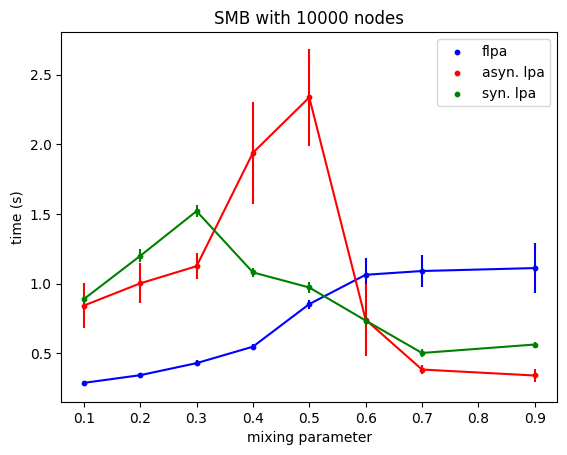

In [1]:
#Plotting the computing times for the LPA asyn., LPA syn., FLPA on a SBM synthetic network
#with increasing mixing parameter and fixed number of nodes, number of groups, average degree.

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import timeit
from tqdm import tqdm

#Creating the SBM networks
def create_sbm(num_nodes, num_groups, avg_degree, mu):
    #Number of nodes per group
    nodes_per_group = num_nodes // num_groups
    sizes = [nodes_per_group] * num_groups
    
    remainder = num_nodes % num_groups
    for i in range(remainder):
        sizes[i] += 1

    p_in = ((1 - mu) * avg_degree) / (nodes_per_group - 1)  #Probability within a group
    p_out = (mu * avg_degree) / (num_nodes - nodes_per_group)  #Probability between groups

    #Creating the probability matrix
    probs = np.full((num_groups, num_groups), p_out)
    np.fill_diagonal(probs, p_in)  
    
    #Generating the SBM network
    G = nx.stochastic_block_model(sizes, probs, seed=42)
    
    return G  

#Parameters
n= 10000
num_groups = 100
avg_degree = 10
mu_v = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.9]

#Initializing the variables
medium_t_flpa=[]
medium_t_lpa_asyn=[]
medium_t_lpa_syn=[]
std_t_flpa=[]
std_t_lpa_asyn=[]
std_t_lpa_syn=[]
j=0


for mu in mu_v:
    print(j)
    t_iterations_lpa_asyn=[]
    t_iterations_lpa_syn=[]
    t_iterations_flpa=[]

    G = create_sbm(n, num_groups, avg_degree, mu)
    #Printing parameters of the created network
    print(f"Nodes: {n}, Edges: {G.number_of_edges()}, Mixing parameter: {mu}, Number of groups: {num_groups}")

    for i in tqdm(range(20), desc="Computing"):
        #Computing time for FLPA
        start_time = timeit.default_timer() 
        communities_flpa=list(nx.community.fast_label_propagation_communities(G))
        end_time = timeit.default_timer() 
        t_iteration = end_time - start_time
        t_iterations_flpa.append(t_iteration)

        #Computing time for asyn. LPA
        start_time = timeit.default_timer() 
        communities_lpa_asyn = list(nx.community.asyn_lpa_communities(G))
        end_time = timeit.default_timer() 
        tempo_iterazione = end_time - start_time  
        t_iterations_lpa_asyn.append(tempo_iterazione)

        #Computing time for syn. LPA
        start_time = timeit.default_timer() 
        communities_lpa_syn = list(nx.community.label_propagation_communities(G))
        end_time = timeit.default_timer() 
        tempo_iterazione = end_time - start_time  
        t_iterations_lpa_syn.append(tempo_iterazione)

    #Computing average and standard deviation for each algorithm
    medium_t_flpa.append(np.mean(t_iterations_flpa))
    std_t_flpa.append(np.std(t_iterations_flpa))
    print(f"Average time for flpa: {round(medium_t_flpa[j], 4)} seconds +- {round(std_t_flpa[j], 4)}.")

    medium_t_lpa_asyn.append(np.mean(t_iterations_lpa_asyn))
    std_t_lpa_asyn.append(np.std(t_iterations_lpa_asyn))
    print(f"Average time for asyn. lpa: {round(medium_t_lpa_asyn[j], 4)} seconds +- {round(std_t_lpa_asyn[j], 4)}.")

    medium_t_lpa_syn.append(np.mean(t_iterations_lpa_syn))
    std_t_lpa_syn.append(np.std(t_iterations_lpa_syn))
    print(f"Average time for syn. lpa: {round(medium_t_lpa_syn[j], 4)} seconds +- {round(std_t_lpa_syn[j], 4)}.")
    
    j=j+1

#Plotting the results
plt.scatter(mu_v, medium_t_flpa,color='blue', label='FLPA',s=10)
plt.errorbar(mu_v, medium_t_flpa,yerr=std_t_flpa,color='blue')
plt.scatter(mu_v, medium_t_lpa_asyn,color='red', label='Asyn. LPA',s=10)
plt.errorbar(mu_v, medium_t_lpa_asyn,yerr=std_t_lpa_asyn,color='red')
plt.scatter(mu_v, medium_t_lpa_syn,color='green', label='Syn. LPA', s=10)
plt.errorbar(mu_v, medium_t_lpa_syn,yerr=std_t_lpa_syn,color='green')

plt.xlabel('mixing parameter')
plt.ylabel('time (s)')
plt.title(f'SBM with {n} nodes' )
plt.legend()
plt.savefig("SBM_fixednodes.png")
plt.show()